## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [1]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

### Note:
#### In case you have trouble opening the "communes_pop.xls" file, try installing an input library: "pip install openpyxl"

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

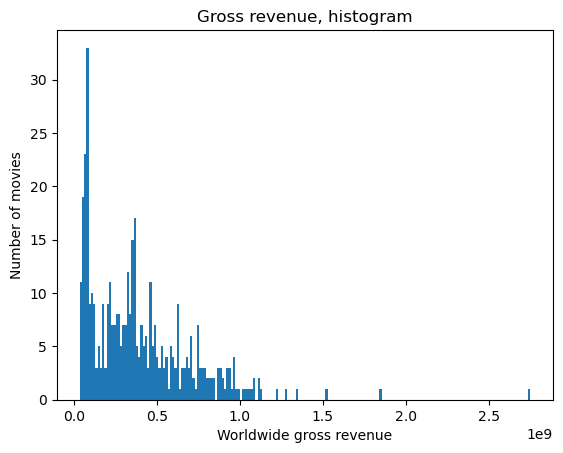

In [2]:
#we use pandas wrapper
#movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
plt.hist(movies['worldwide_gross'].values, bins = 200)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

plt.show()

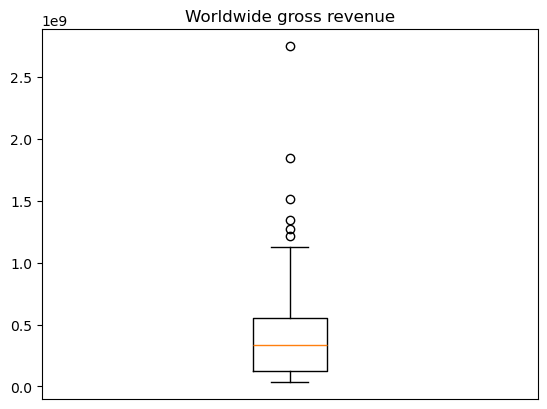

In [3]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');
plt.show()

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

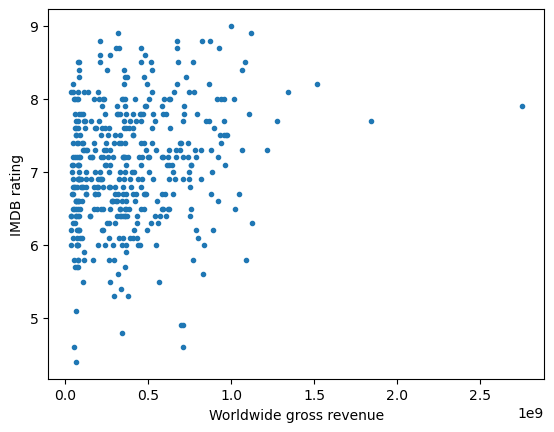

In [4]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], marker='.') # I added marker='.'

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')
plt.show()

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

In [5]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

Text(0, 0.5, 'IMDB rating')

- Do you notice anything strange? What could be the reason?

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

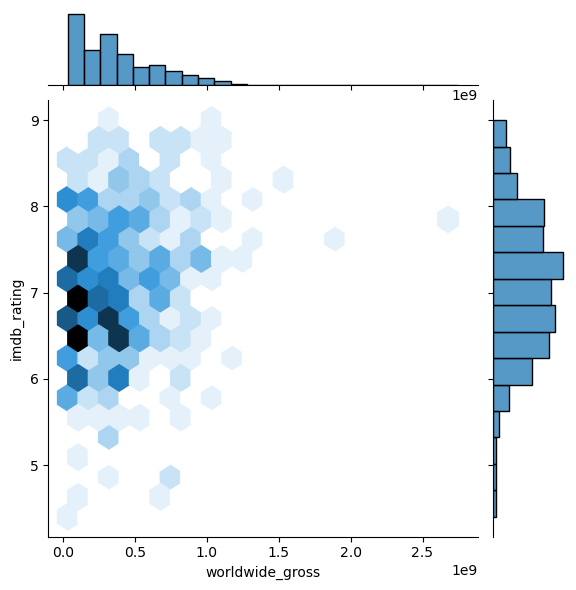

In [234]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex")
plt.show()

In [7]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


In [8]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

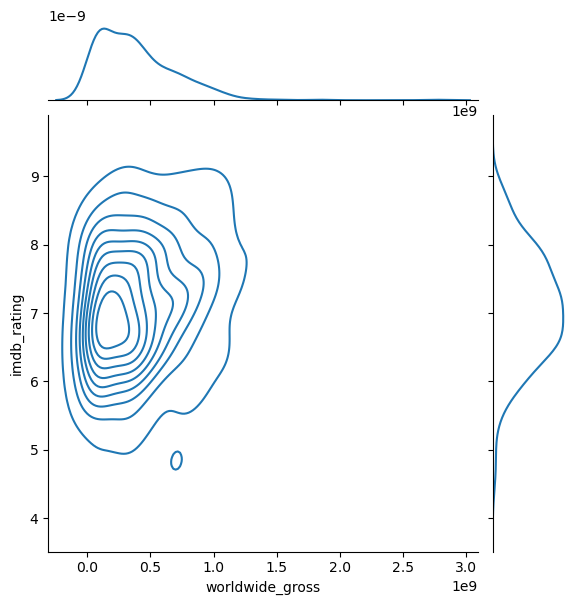

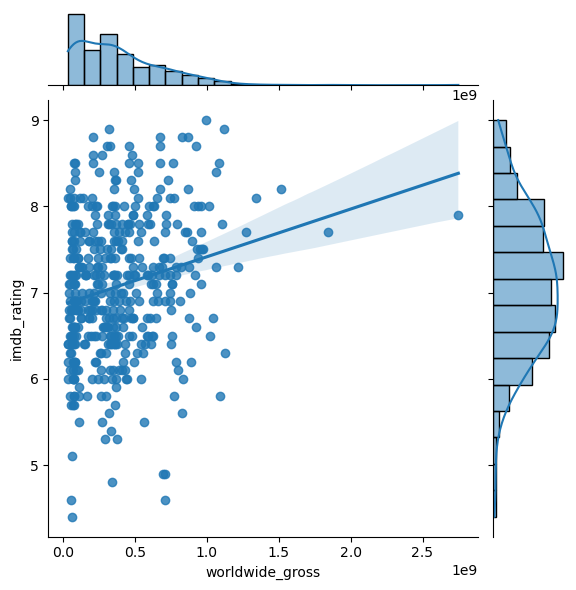

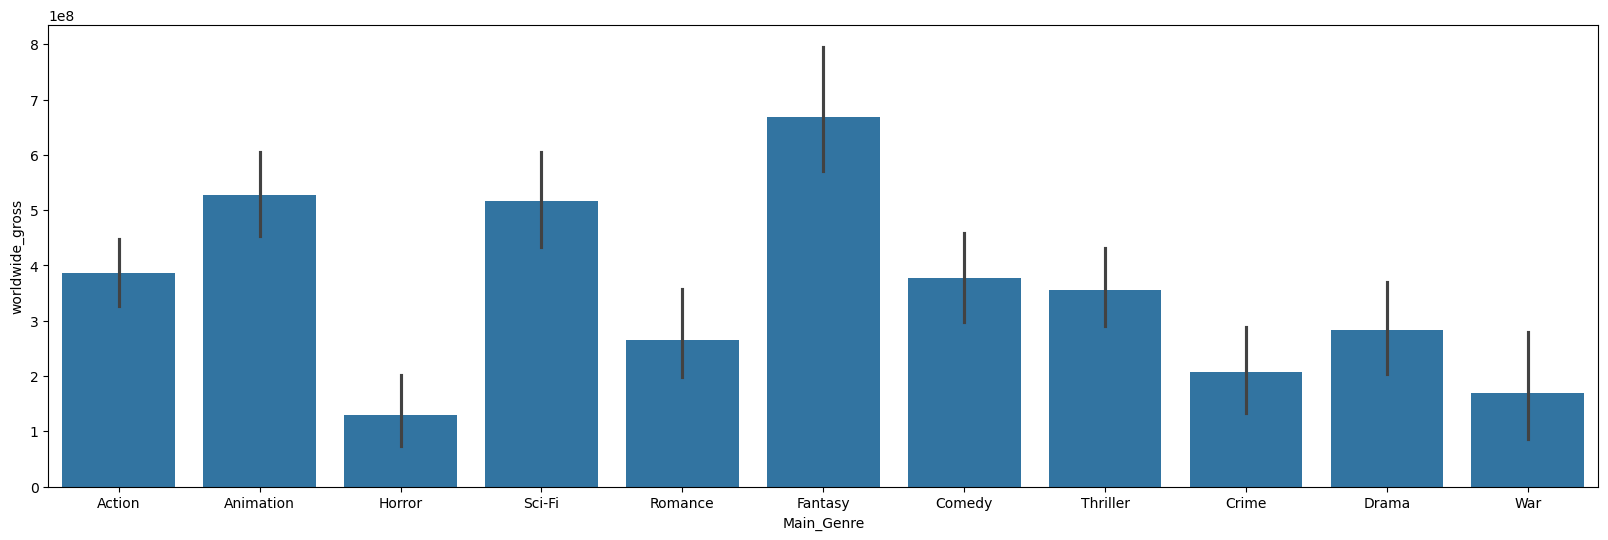

In [9]:

plt.figure(figsize=(20, 6)) 
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance',
                                                                                      'Animation','Action','Horror','Drama','War','Crime'])], width=0.8)

plt.show()

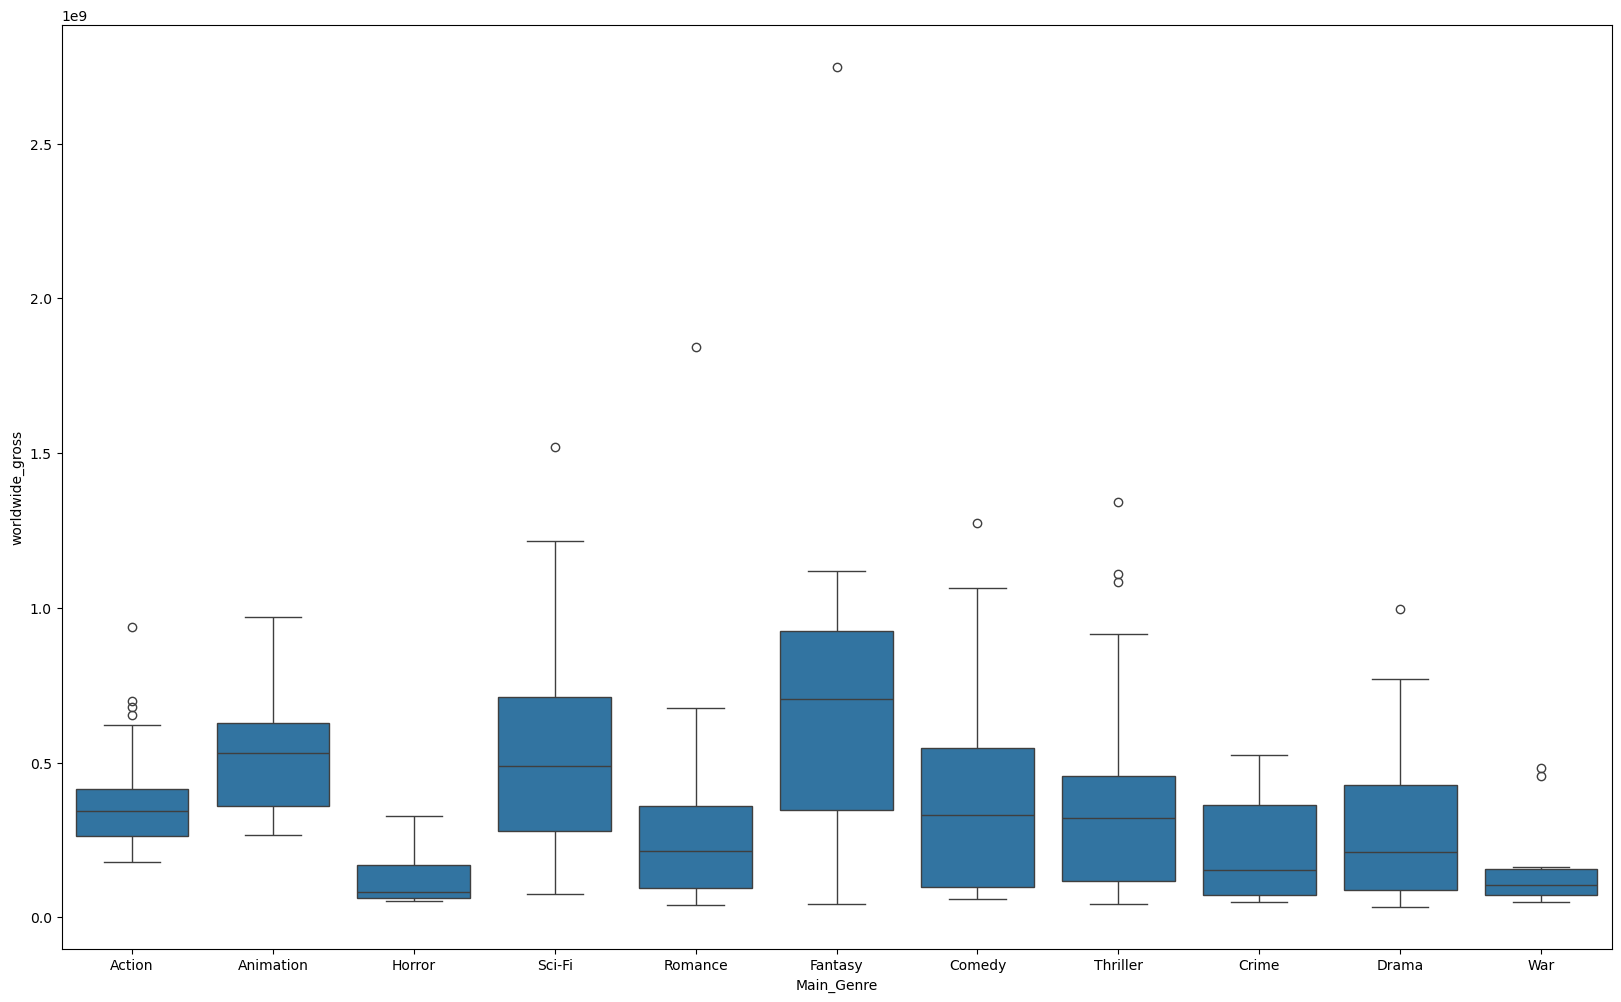

In [10]:
plt.figure(figsize=(20, 12)) 
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance',
                                                                                        'Animation','Action','Horror','Drama','War','Crime'])])
plt.show()

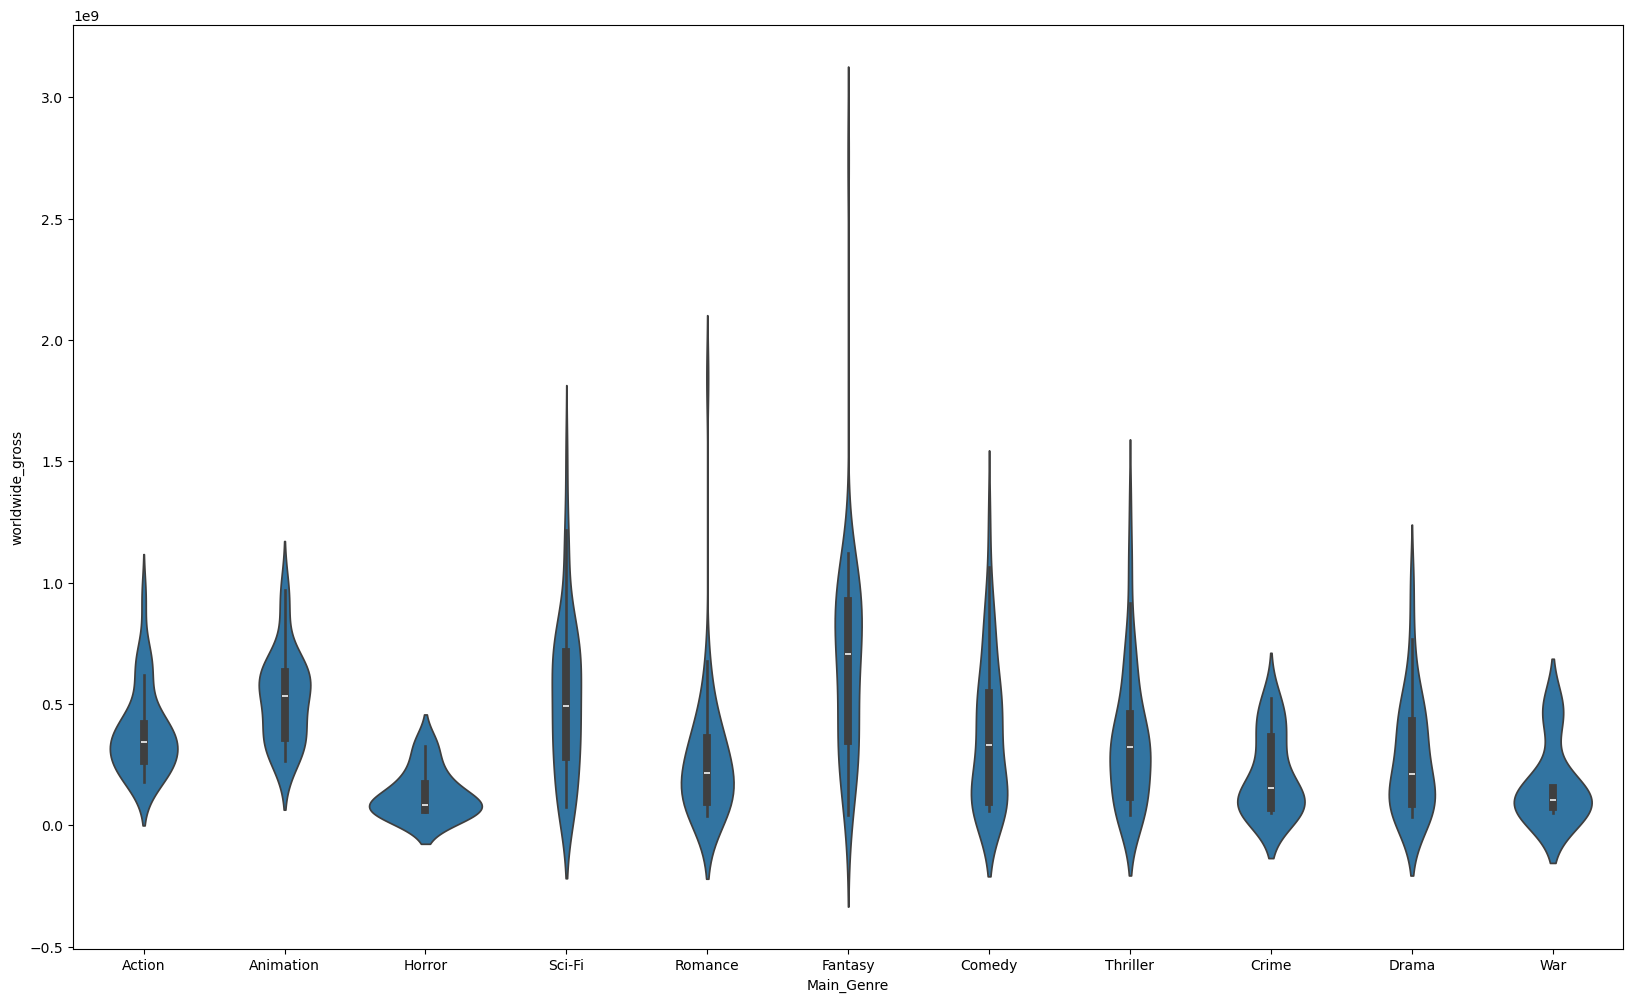

In [11]:
plt.figure(figsize=(20, 12)) 
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance',
                                                                                      'Animation','Action','Horror','Drama','War','Crime'])])
plt.show()

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [12]:
# Calculate yearly stats across movies here

'''
mean_gross_per_year = movies.groupby(movies['year'])
mean_gross_per_year.head()
#type(mean_gross_per_year)

#ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=mean_gross_per_year)
'''

stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({
        'average_worldwide_gross': x['worldwide_gross'].mean(),
        'std_dev_worldwide_gross': x['worldwide_gross'].std()
    }))


C:\Users\babou\AppData\Local\Temp\ipykernel_37472\2248799077.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({


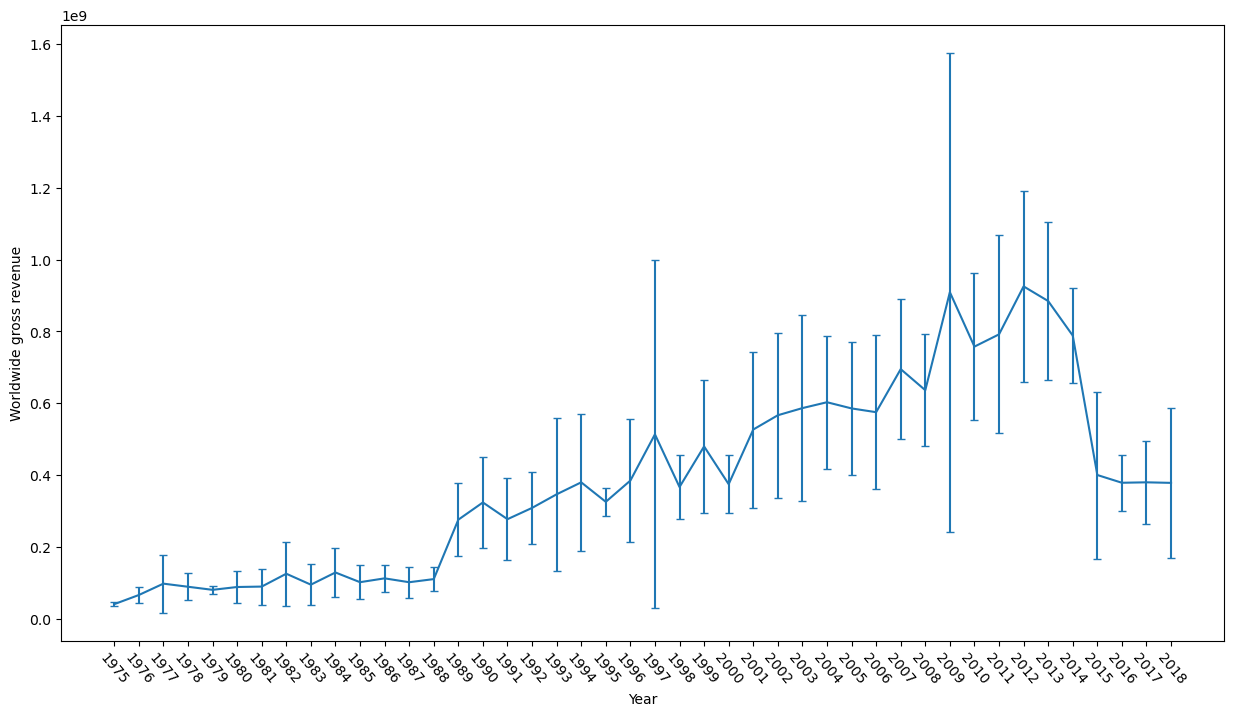

In [37]:
# Write your code to make plot with errorbars here

plt.figure(figsize=(15,8))
plt.errorbar(x=stats_by_year.index, y=stats_by_year['average_worldwide_gross'], yerr=stats_by_year['std_dev_worldwide_gross'], capsize= 3)
plt.xticks(stats_by_year.index)
plt.xticks(rotation=310)


plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')
plt.show()

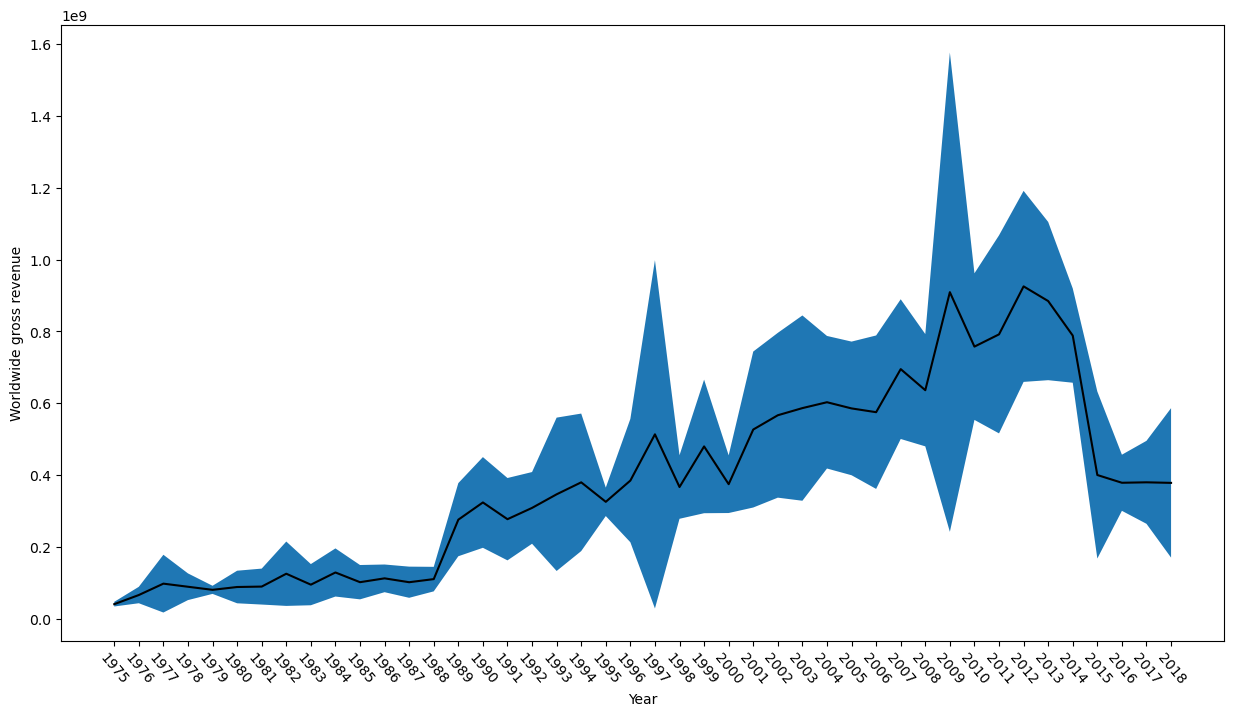

In [42]:
# Write your code to make filled plot here
plt.figure(figsize=(15,8))
plt.xticks(stats_by_year.index)
plt.xticks(rotation=310)
plt.fill_between(stats_by_year.index, stats_by_year.average_worldwide_gross - stats_by_year.std_dev_worldwide_gross,
                                         stats_by_year.average_worldwide_gross + stats_by_year.std_dev_worldwide_gross)
plt.plot(stats_by_year.average_worldwide_gross, color = 'black')

plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')
plt.show()

In [15]:
# Write your interpretation here

'''
The average revenue increased steadily until the year 2012 where the average revenue started to drop considerably. 
This is most likely due to the increase in popularity of streaming sites and platforms such as netflix
'''

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a sketch of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong to? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [56]:
# Calculate stats by genre here
stats_by_genre = movies.groupby(movies['Main_Genre']).apply(lambda x: pd.Series({
                                                            'length': x['length'].values
                                                            }))
stats_by_genre.head()

C:\Users\babou\AppData\Local\Temp\ipykernel_37472\3629037970.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_genre = movies.groupby(movies['Main_Genre']).apply(lambda x: pd.Series({


,length
Main_Genre,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."
Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1..."
Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,..."
Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1..."


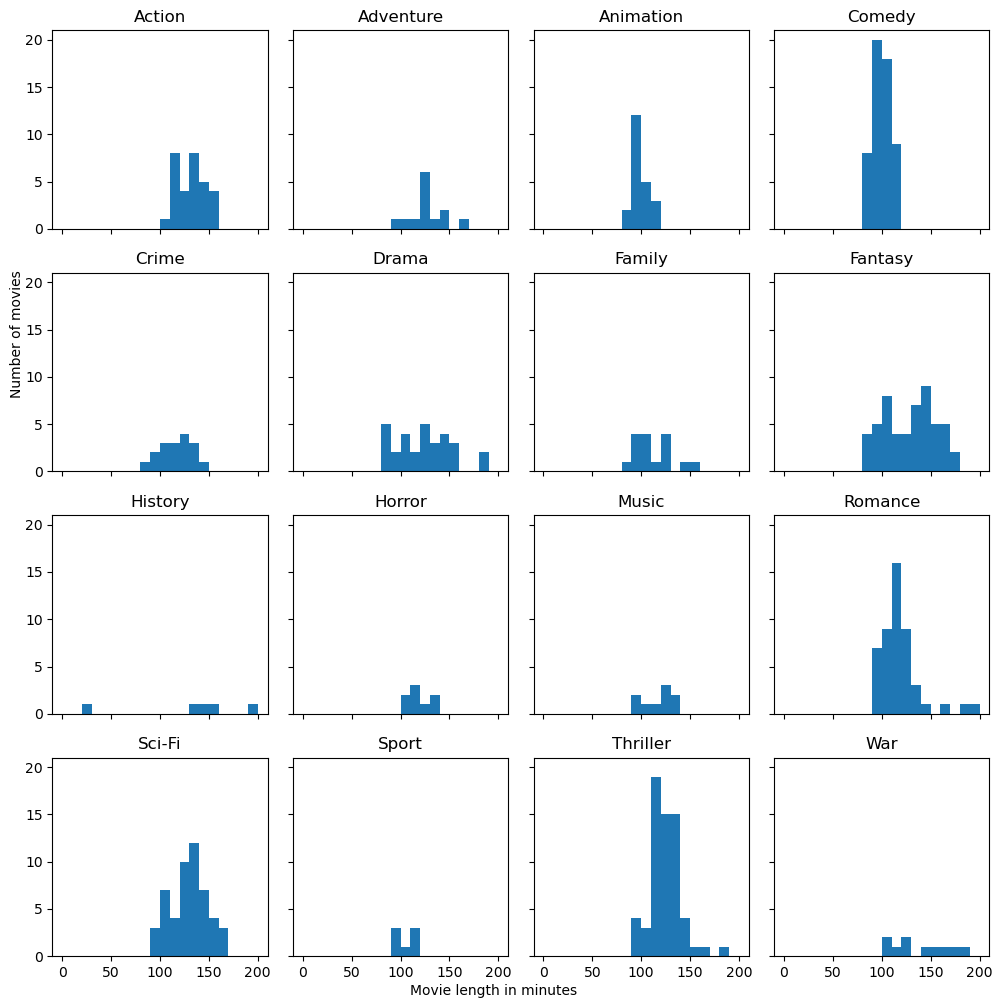

In [71]:
# Write your code to make 4x4 panel here
x_y_dim = 4

fig, ax = plt.subplots(nrows=x_y_dim, ncols=x_y_dim, figsize=(10, 10), sharex=True, sharey=True)

for i in range(x_y_dim):
    extra = i*3
    for j in range(x_y_dim):
        ax[i, j].hist(stats_by_genre.iloc[i + j + extra], range = [0,200], bins=20)
        ax[i, j].set_title(stats_by_genre.index[i + j + extra])
    


fig.tight_layout()

fig.text(0.4,0, "Movie length in minutes")
fig.text(0,0.6, "Number of movies", rotation = 90)
plt.show()

In [76]:
stats_by_genre['mean_runtime'] = stats_by_genre['length'].apply(np.mean)
stats_by_genre.head()

,length,mean_runtime
Main_Genre,,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ...",130.566667
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ...",127.153846
Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1...",98.227273
Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,...",99.400000
Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1...",115.235294


In [84]:
max_mean = stats_by_genre['mean_runtime'].max()

# Find the row(s) where the mean equals the maximum mean
max_mean_row = stats_by_genre[stats_by_genre['mean_runtime'] == max_mean]
max_mean_row.head()

,length,mean_runtime
Main_Genre,,
War,"[117, 169, 145, 121, 120, 106, 109, 153, 182, ...",139.7


In [18]:
# Write your interpretation here
'''
The longest movies can be found in the War Genre.
Animation and Comedy Genres have a very low variation in their runtimes considering the amount of movies produced
'''

## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

In [ ]:
# Write your code to make the first heatmap here
blockbustrer_per_studio = pd.crosstab(movies.studio, movies.Main_Genre)
#blockbustrer_per_studio.head() # 16 studios in total

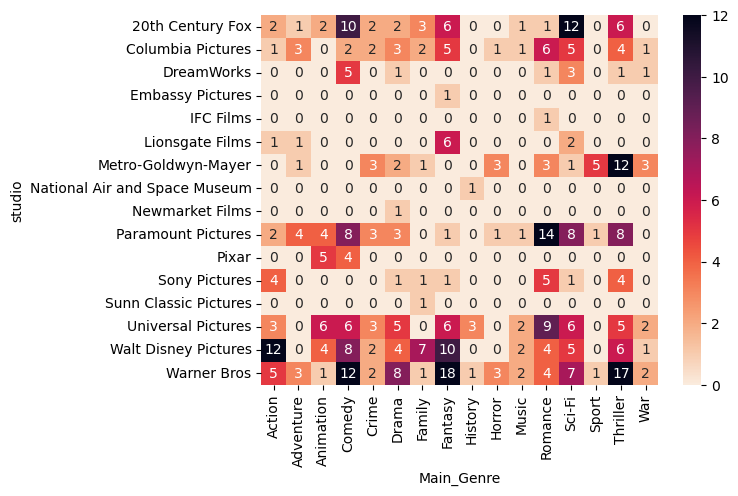

In [98]:

sns.heatmap(blockbustrer_per_studio, cmap='rocket_r', robust=True, annot=True)
plt.show()

In [ ]:
# Write your code to make the second heatmap here
# Finally, with a heatmap we can represent three variables, by coding a third variable with color.
# Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre.
# What is the average worldwide gross revenue for movies with different combinations of main and second genre?


#crosstab_mean_gross = pd.crosstab(movies.Main_Genre, movies.Genre_2, values=movies.worldwide_gross, aggfunc=sum) # DOESN'T GIVE US THE MEAN!
crosstab_mean_gross = pd.pivot_table(movies, index='Main_Genre', columns='Genre_2', values='worldwide_gross', aggfunc='mean')
#crosstab_mean_gross.head() # 16 studios in total


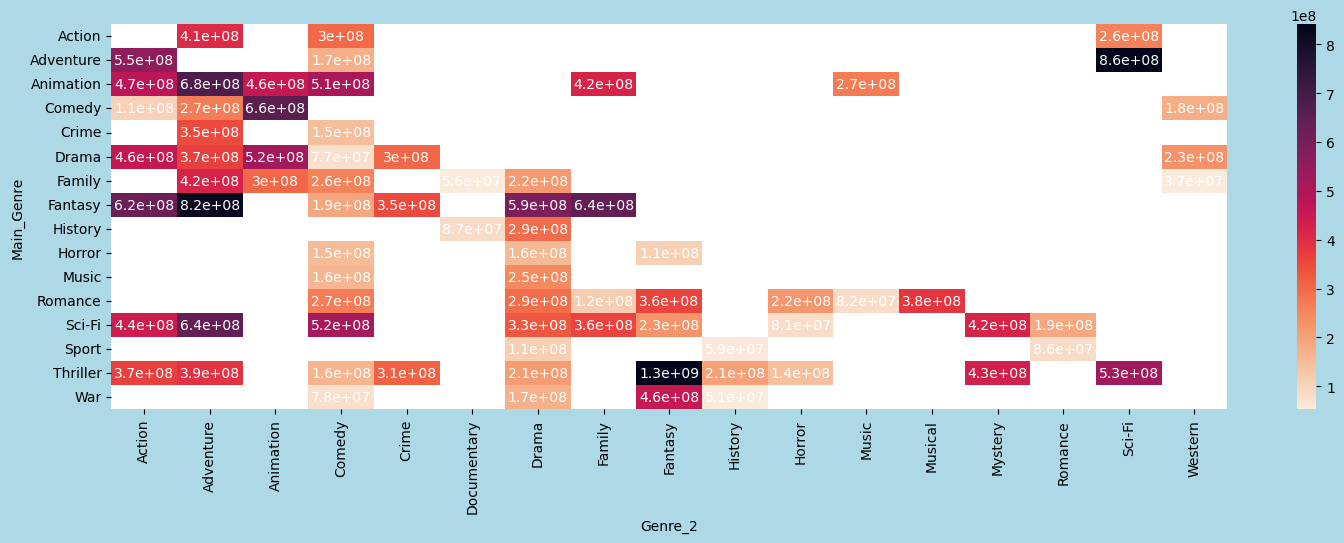

In [153]:
# Main_Genre & Genre_2 average gross income
plt.figure(figsize=(18, 5), facecolor='lightblue')
sns.heatmap(crosstab_mean_gross, cmap='rocket_r', robust=True, annot=True, annot_kws={"color": "white"})
plt.show()

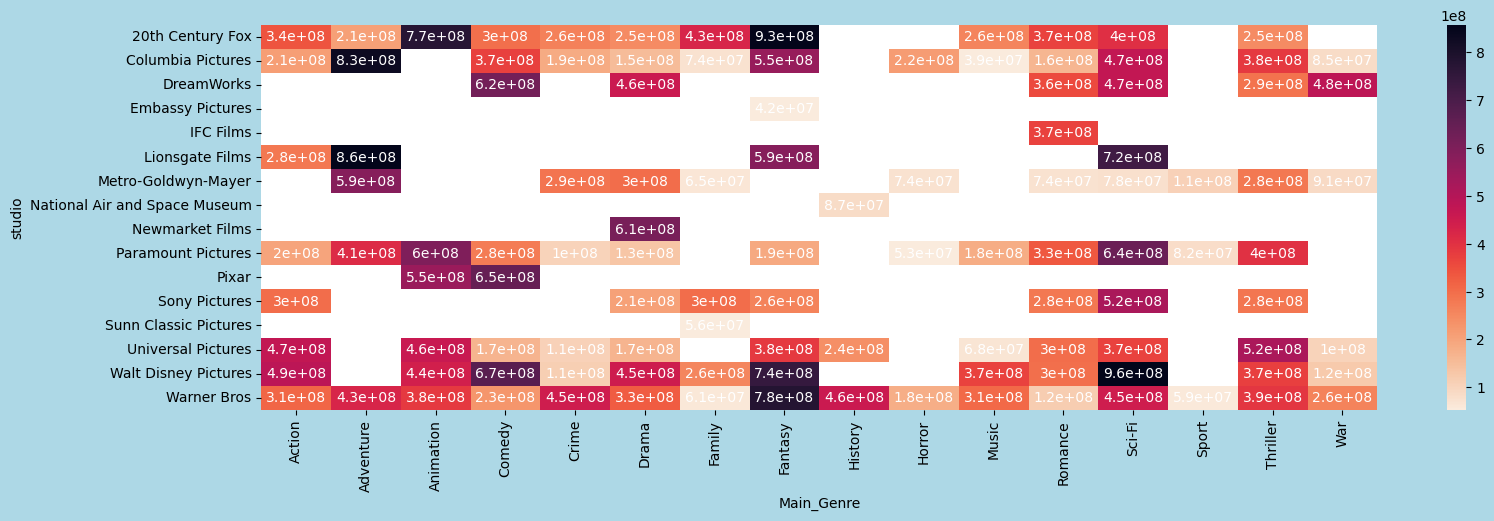

In [157]:
# Main_Genre & studio average gross income
crosstab_mean_gross2 = pd.pivot_table(movies, index='studio', columns='Main_Genre', values='worldwide_gross', aggfunc='mean')
plt.figure(figsize=(18, 5), facecolor='lightblue')
sns.heatmap(crosstab_mean_gross2, cmap='rocket_r', robust=True, annot=True, annot_kws={"color": "white"})
plt.show()

In [ ]:
'''
# Verification
nbr_2genre = pd.crosstab(movies.Main_Genre, movies.Genre_2)
sns.heatmap(nbr_2genre, cmap='rocket_r', robust=True, annot=True)
plt.show()

list1 = movies[(movies['Main_Genre'] == 'Animation') & (movies['Genre_2'] == 'Family')]
print(list1[['title', 'Main_Genre', 'Genre_2', 'worldwide_gross']])
print(list1.worldwide_gross.mean())
print(list1.worldwide_gross.sum())
'''        

In [21]:
# Write your interpretations here
'''
What genres do the majority of movies made by Warner Bros studio fall into? - Fantasy (18), then Thriller (17)
What is the most successful genre of Walt Disney pictures movies? - Surprisingly it's not Fantasy but Sci-fi
What studio made the largest number of Romance blockbusters? - Paramount Pictures
Which combination of genres brings the highest revenue? - Thriller Fantasies (avg: 1.3 billion $)
'''

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

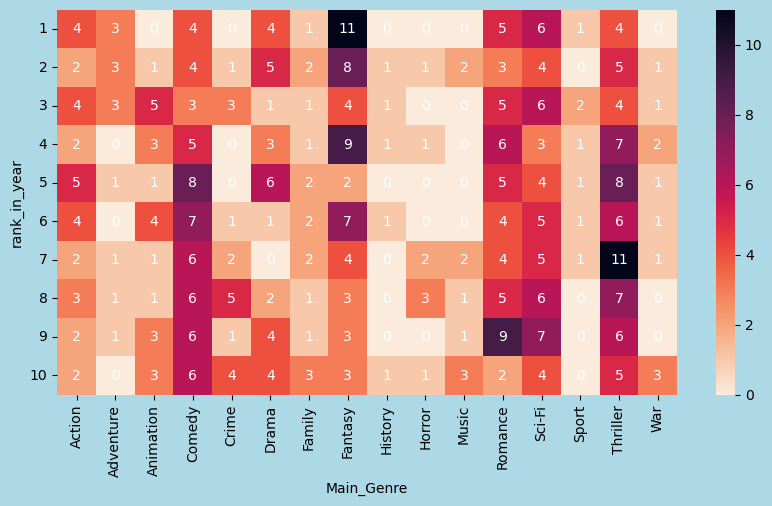

In [167]:
# Write your dataviz show-off code here

#rank_vs_genres = pd.pivot_table(movies, index='rank_in_year', columns='Main_Genre', aggfunc='sum')
rank_vs_genres = pd.crosstab(movies['rank_in_year'], movies['Main_Genre'])
plt.figure(figsize=(10, 5), facecolor='lightblue')
sns.heatmap(rank_vs_genres, cmap='rocket_r', robust=False, annot=True, annot_kws={"color": "white"})
plt.yticks(rotation=0)
plt.show()

In [171]:
# Get the total count of movies for each Main_Genre
main_genre_counts = movies['Main_Genre'].value_counts()

# Display the result
print(main_genre_counts)

Main_Genre
Thriller     63
Comedy       55
Fantasy      54
Sci-Fi       50
Romance      48
Action       30
Drama        30
Animation    22
Crime        17
Family       16
Adventure    13
War          10
Music         9
Horror        8
Sport         7
History       5
Name: count, dtype: int64


In [174]:
# Test to see which method is better
# Get the total count of movies for each Main_Genre using groupby
main_genre_counts = movies.groupby('Main_Genre').size()

# Display the result
print(main_genre_counts.sort_index)

<bound method Series.sort_index of Main_Genre
Action       30
Adventure    13
Animation    22
Comedy       55
Crime        17
Drama        30
Family       16
Fantasy      54
History       5
Horror        8
Music         9
Romance      48
Sci-Fi       50
Sport         7
Thriller     63
War          10
dtype: int64>


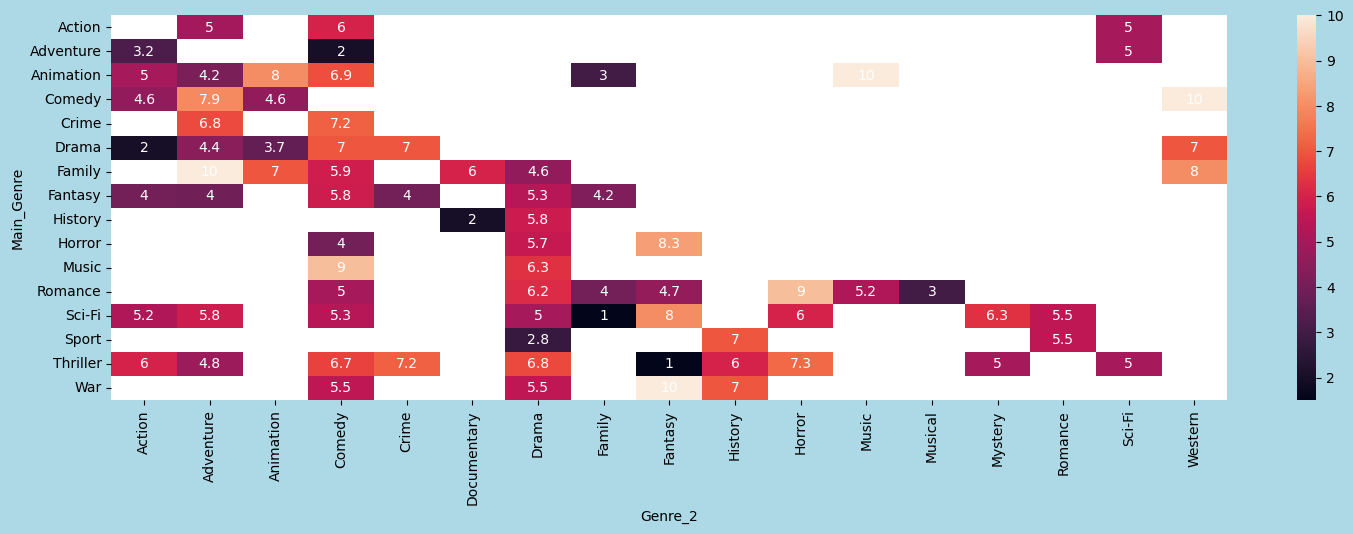

In [169]:
rank_vs_genre_p2 = pd.pivot_table(movies, index='Main_Genre', columns='Genre_2', values='rank_in_year', aggfunc='mean')
plt.figure(figsize=(18, 5), facecolor='lightblue')
sns.heatmap(rank_vs_genre_p2, cmap='rocket', robust=True, annot=True, annot_kws={"color": "white"})
plt.show()

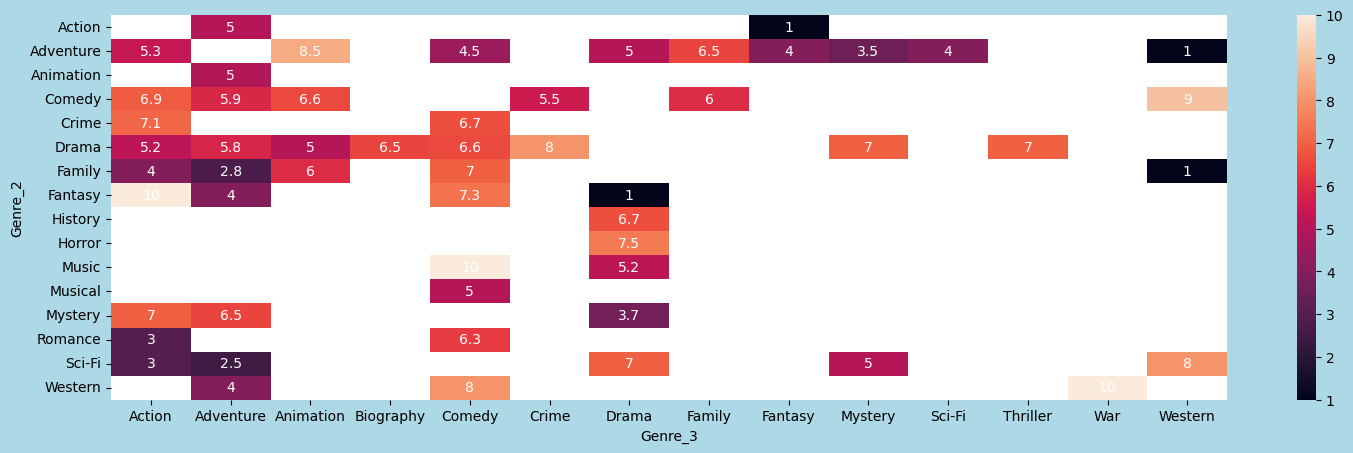

In [170]:
rank_vs_genre_p3 = pd.pivot_table(movies, index='Genre_2', columns='Genre_3', values='rank_in_year', aggfunc='mean')
plt.figure(figsize=(18, 5), facecolor='lightblue')
sns.heatmap(rank_vs_genre_p3, cmap='rocket', robust=True, annot=True, annot_kws={"color": "white"})
plt.show()

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

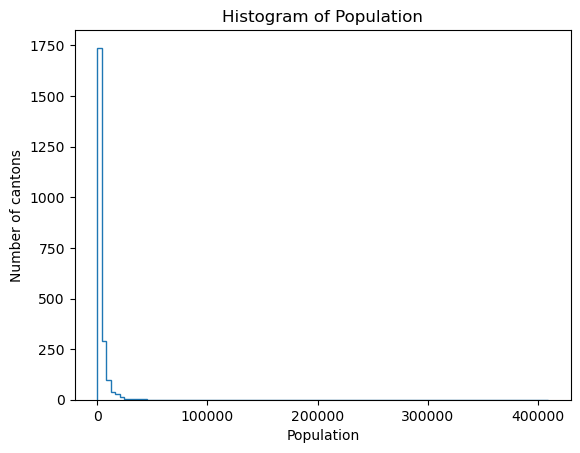

In [180]:
# Write your code here
''''commune','population_Jan','birth_alive','death','natrual_increase','arrivals','departure','migratory_balance',
    'divergence_statistic','population_Dec','variation_num','variation_ratio'])'''

#pop_Dec = pop_per_commune[['commune'],['population_Dec']]
#plt.hist(pop_Dec, bins=30)
# Wrong because commune is already the index

#plot out the histogram of population Counts in December
plt.hist(pop_per_commune.population_Dec,bins=100,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons')
plt.xlabel('Population')
plt.show()

In [233]:
# Communes with the highest number of population
pop_per_commune.sort_values('population_Dec', ascending=False).head()


,commune,population_Jan,birth_alive,death,natrual_increase,arrivals,departure,migratory_balance,divergence_statistic,population_Dec,variation_num,variation_ratio
181,......0261 Zürich,402762,5289,3486,1803,35044,28684,6360,-1684,409241,6479,1.608642
2321,......6621 Genève,198979,2434,1397,1037,22666,20032,2634,-2102,200548,1569,0.788525
993,......2701 Basel,171017,1923,1846,77,11349,11000,349,70,171513,496,0.290030
1962,......5586 Lausanne,137810,1733,997,736,14233,14031,202,157,138905,1095,0.794572
377,......0351 Bern,133115,1689,1276,413,11325,10384,941,-671,133798,683,0.513090


In [227]:
# Answer

'''
There is a vast majority of communes that have small population (rural) with only a few noticable exceptions (urban).
Zurich is a clear outlier with its 400'000 plus population (twice as many as the second largest commune Geneva).
'''




__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. 

Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw.png" style="width: 600px;" align="left">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

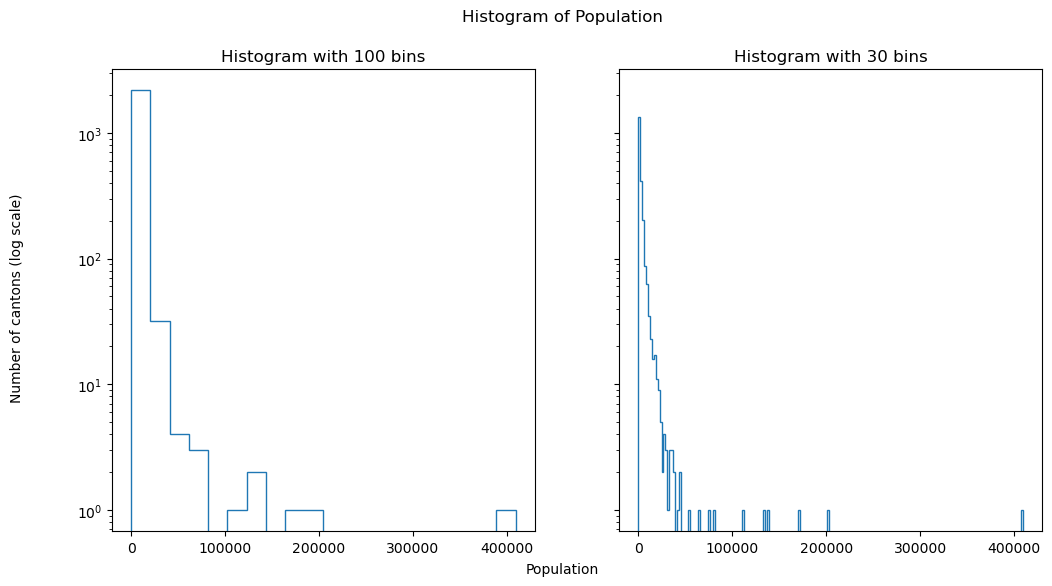

In [204]:
# Write your code here


fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True, figsize=(12, 6))
ax[0].hist(pop_per_commune.population_Dec,bins=20, histtype='step', log=True)
ax[1].hist(pop_per_commune.population_Dec,bins=200, histtype='step', log=True)

# Set title and labels for each subplot
ax[0].set_title('Histogram with 100 bins')
ax[1].set_title('Histogram with 30 bins')

# Common x and y labels
fig.suptitle('Histogram of Population')
fig.text(0.5, 0.04, 'Population', ha='center')
fig.text(0.04, 0.5, 'Number of cantons (log scale)', va='center', rotation='vertical')

plt.show()

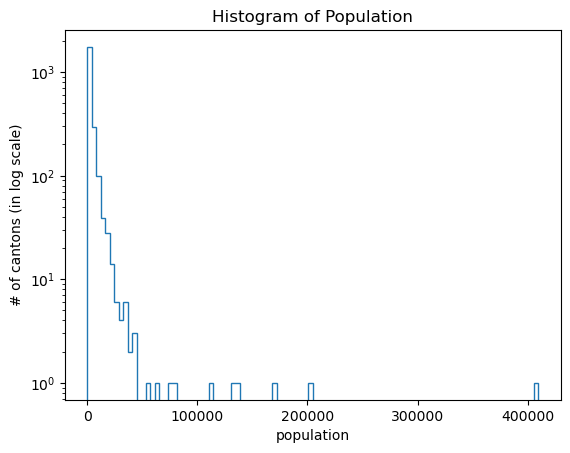

In [217]:
# Same as the two subplots above

bin_100 = plt.hist(pop_per_commune.population_Dec, bins=100, histtype='step', log=True)
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

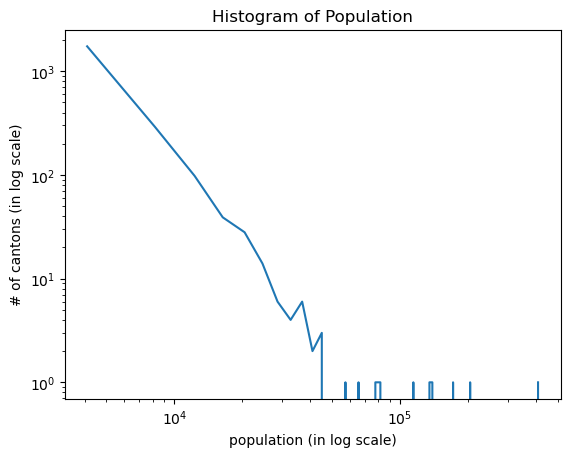

In [218]:
plt.loglog(bin_100[1][1:],bin_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

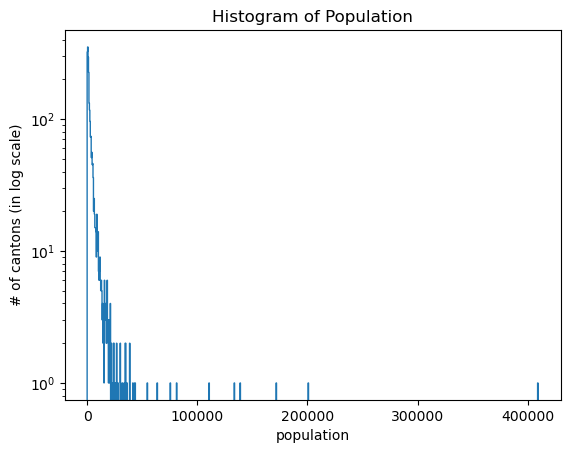

In [223]:
bin_1000 = plt.hist(pop_per_commune.population_Dec, bins=1000, histtype='step', log=True)
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

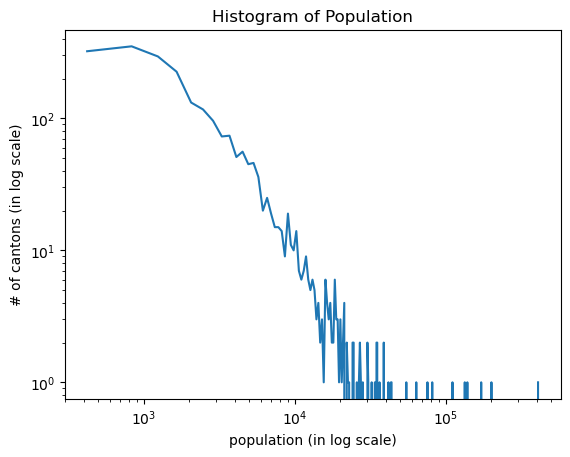

In [224]:
plt.loglog(bin_1000[1][1:],bin_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

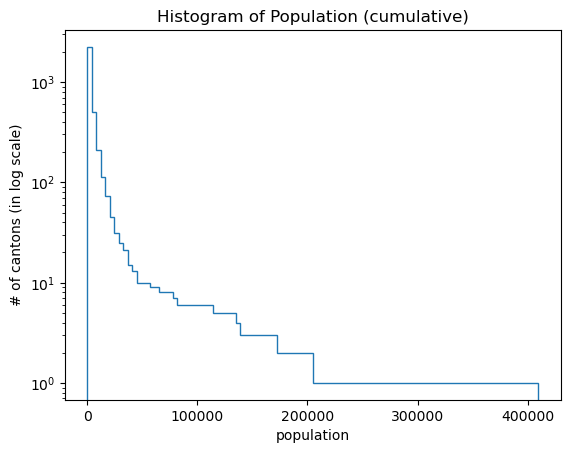

In [225]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

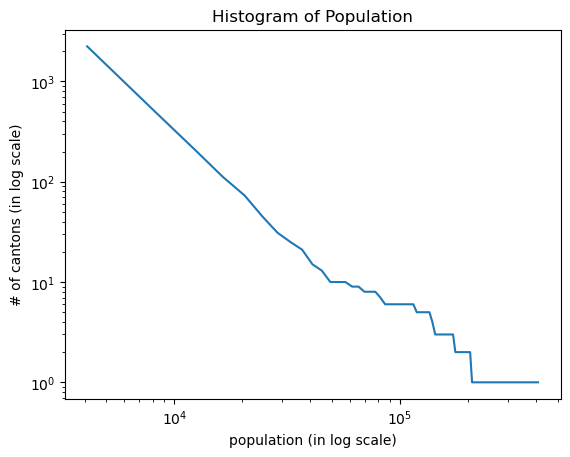

In [226]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

In [25]:
# Write your interpretations here

'''
What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value
(i.e. population in case of the communal data) for each bin?

- When using less bins, it is harder to see precisely how many people live in a given commune but increasing the number of bins creates artifacts.
- A good alternative is the cumulative plot which solves the artifact problem

'''